In [34]:
"""
# TASK 1: Compute image descriptors (QS1)

Color Histogram:
    - gray level / concatenate color component histograms
    - color space RGB, CieLab, YCbCr, HSV, etc.
    - Compulsory to use 1D histograms!
"""

'\n# TASK 1: Compute image descriptors (QS1)\n\nColor Histogram:\n    - gray level / concatenate color component histograms\n    - color space RGB, CieLab, YCbCr, HSV, etc.\n    - Compulsory to use 1D histograms!\n'

In [35]:
# Read data
import zipfile

def extract(path_to_zip_file: str, directory_to_extract_to: str) -> None:
    with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
        zip_ref.extractall(directory_to_extract_to)

DATA_DIRECTORY = './data'
extract(f'{DATA_DIRECTORY}/BBDD.zip', DATA_DIRECTORY)
extract(f'{DATA_DIRECTORY}/qsd1_w1.zip', DATA_DIRECTORY)

In [36]:
from enum import Enum
from typing import Optional, List, Callable
import cv2
import matplotlib.pyplot as plt
import numpy as np

class DatasetHistogramDescriptors:
    def __init__(self, histogram_descriptors):
        if isinstance(histogram_descriptors, Image):
            self.descriptors = [histogram_descriptors]
        elif isinstance(histogram_descriptors, list):
            self.descriptors = histogram_descriptors
        else:
            print("Dataset should be built from either a ImageHistogramDescriptor or a list of ImageHistogramDescriptor 's")
    
    def load_dataset(directory_path):
        pass


class ColorSpace(Enum):
    gray = cv2.COLOR_BGR2GRAY
    RGB = cv2.COLOR_BGR2RGB
    HSV = cv2.COLOR_BGR2HSV
    CieLab = cv2.COLOR_BGR2Lab
    YCbCr = cv2.COLOR_BGR2YCrCb

def euclidean_distance(hist1: List[np.array], hist2: List[np.array]) -> float:
    return np.linalg.norm(hist1 - hist2)

def hellinger_kernel(hist1: List[np.array], hist2: List[np.array]) -> float:
    # to be implemented
    return -1

class DistanceType(Enum):
    euclidean = euclidean_distance

class SimilarityType(Enum):
    hellingerKernel = hellinger_kernel
    
class Image:
    def __init__(self, path: str, colorspace: ColorSpace = ColorSpace.RGB, interval: int = 1):
        self.path = path
        self.image = cv2.imread(path)
        self.colorspace = colorspace
        self.interval = interval
        self.histogram_descriptor = self.compute_image_histogram_descriptor()

    def compute_image_histogram_descriptor(self):
        # Convert image to colorspace
        converted_img = cv2.cvtColor(self.image, self.colorspace.value)
        # Separate the channels
        channels = cv2.split(converted_img)

        # Create histogram
        histograms = []
        for channel in channels:
            # Compute histogram
            hist, _ = np.histogram(channel, bins=np.arange(0, 256, self.interval))  # Intervals of histogram given by bin_size
            histograms.append(hist)

        # Flatten each histogram to create a 1D array for each channel
        return [hist.flatten() for hist in histograms]
    

    def plot_histograms(self, savepath: Optional[str] = None):
        channel_names = self.get_channel_names()

        fig, axs = plt.subplots(1, len(self.histogram_descriptor), figsize=(15, 5), sharey=True)

        for i, hist in enumerate(self.histogram_descriptor):
            axs[i].bar(range(len(hist)), hist, width=0.5, color='blue', alpha=0.7)
            axs[i].set_title(f'{channel_names[i]}')
            axs[i].set_xlabel('Intensity')
            axs[i].set_ylabel('Frequency')
            axs[i].set_xlim(-1, len(hist))
            # axs[i].set_xticks(range(len(hist)))
            # axs[i].set_xticklabels([f"{(j + 1) * self.interval - 1}" for j in range(len(hist))], rotation=45)
            axs[i].grid(False)

        plt.tight_layout()
        fig.suptitle(self.colorspace.name)

        # Save plot if savepath is provided
        if savepath:
            plt.savefig(f"{savepath}/{channel_names[i]}_{self.colorspace.name}_histogram.png")

        plt.show()

    def get_channel_names(self):
        # Asociate the colorspace to the names of their channels
        colorspace_dict = {
            'gray': ['Intensity'],
            'RGB': ['R', 'G', 'B'],
            'HSV': ['H', 'S', 'V'],
            'CieLab': ['L', 'a', 'b'],
            'YCbCr': ['Y', 'Cb', 'Cr']
        }
        return colorspace_dict[self.colorspace.name]

    def show(self):
        rgb_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_image)
        plt.show()
    

    def _compute_similarity_or_distance(self, image2: 'Image', func: Callable) -> List[float]:
        result = []
        
        # Assert they have comparable histograms
        assert self.colorspace.name == image2.colorspace.name
        assert self.interval == image2.interval
        
        for i, _ in enumerate(self.histogram_descriptor):
            result.append(
                func(self.histogram_descriptor[i], image2.histogram_descriptor[i])
            )

        return result

    def compute_similarity(self, image2: 'Image', type=SimilarityType):
        return self._compute_similarity_or_distance(image2, type)

    def compute_distance(self, image2: 'Image', type=DistanceType) -> List[float]:
        return self._compute_similarity_or_distance(image2, type)

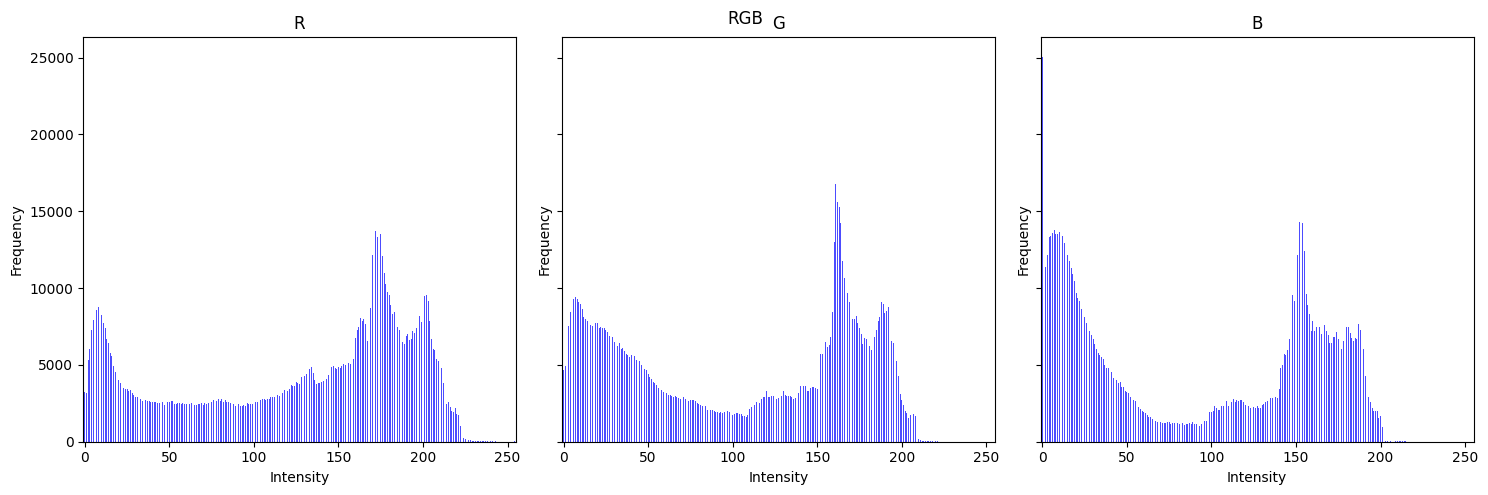

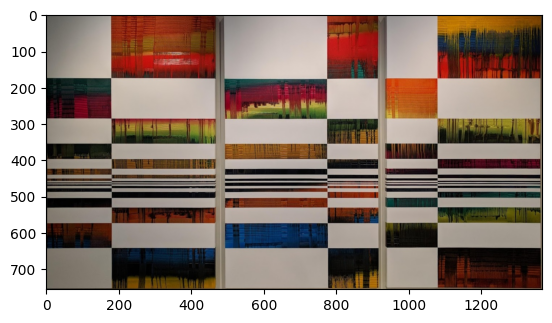

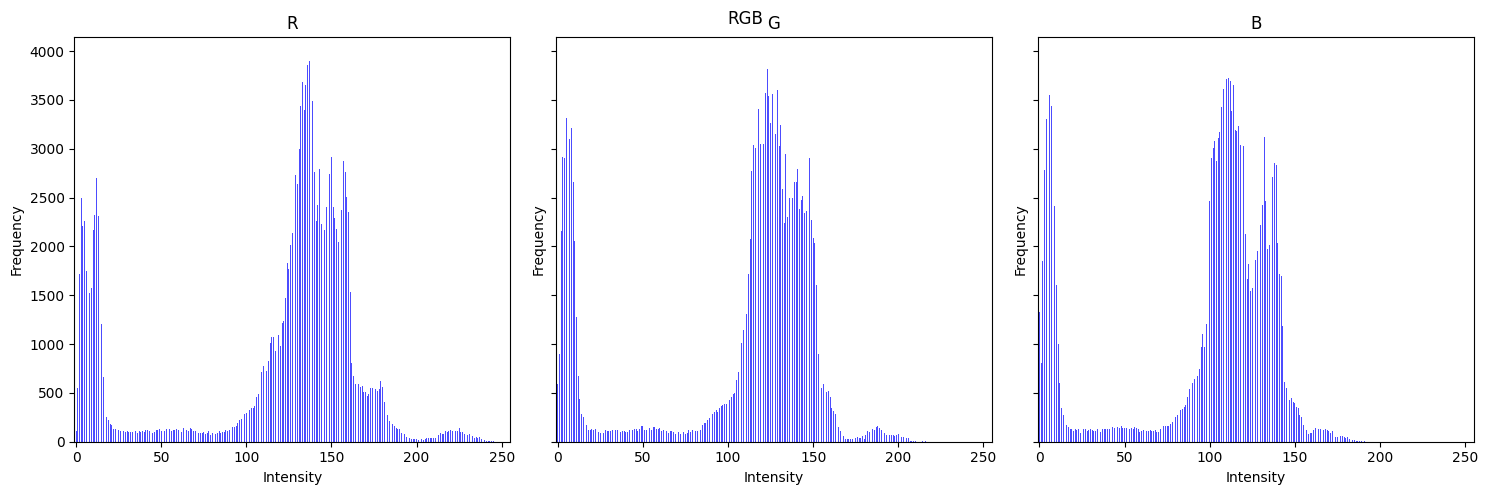

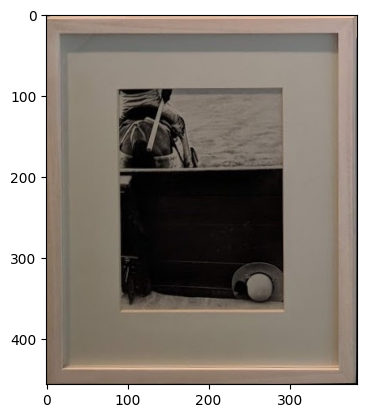

------------------------ Euclidean Distance ------------------------------


[np.float64(70500.68955691143),
 np.float64(76149.96311226947),
 np.float64(85071.37590282645)]

In [37]:
image = Image('./data/BBDD/bbdd_00000.jpg', interval=1)
image.plot_histograms()
image.show()

image2 = Image('./data/BBDD/bbdd_00002.jpg', interval=1)
image2.plot_histograms()
image2.show()

print('------------------------ Euclidean Distance ------------------------------')
image.compute_distance(image2, type=DistanceType.euclidean)

## Task 2

In [38]:
"""
# TASK 2: Similarity measures

Distances:
- Euclidean
- L1
- x^2

Similarity:
- Histogram intersection
- Hellinger kernel

"""
import numpy as np

# Distance metrics
def euclidean_distance(hist1: List[np.array], hist2: List[np.array]) -> float:
    """
    Euclidean distance is the straight-line distance between two points in Euclidean space.

    Parameters:
    hist1 (List[np.array]): The first histogram.
    hist2 (List[np.array]): The second histogram.

    Returns:
    float: The Euclidean distance between the two histograms.
    """
    return np.linalg.norm(hist1 - hist2)

def l1_distance(hist1: List[np.array], hist2: List[np.array]) -> float:
    """
    L1 distance is the sum of the absolute differences between corresponding bins
    in the histograms. It is less sensitive to large differences than Euclidean distance.

    Parameters:
    hist1 (List[np.array]): The first histogram.
    hist2 (List[np.array]): The second histogram.

    Returns:
    float: The L1 (Manhattan) distance.
    """
    return np.sum(np.abs(hist1 - hist2))

def chi2_distance(hist1: List[np.array], hist2: List[np.array]) -> float:
    """
    Chi-squared distance is useful to measure similarity between 2 feature matrices.

    Parameters:
    hist1 (List[np.array]): The first histogram.
    hist2 (List[np.array]): The second histogram.

    Returns:
    float: The Chi-squared distance between the two histograms.
    """
    return 0.5 * np.sum(np.square(hist1 - hist2) / (hist1 + hist2 + 1e-10))

# Similarity metrics
def histogram_intersection_distance(hist1: List[np.array], hist2: List[np.array]) -> float:
    """
    Histogram Intersection measures the overlap between two histograms.

    Parameters:
    hist1 (List[np.array]): The first histogram.
    hist2 (List[np.array]): The second histogram.

    Returns:
    float: The Histogram Intersection distance.
    """
    return np.sum(np.minimum(hist1, hist2))

def hellinger_kernel_distance(hist1: List[np.array], hist2: List[np.array]) -> float:
    """
    Hellinger distance is useful to quantify the similarity between two probability distributions.

    Parameters:
    hist1 (List[np.array]): The first histogram.
    hist2 (List[np.array]): The second histogram.

    Returns:
    float: The Hellinger kernel distance.
    """
    return np.sqrt(0.5 * np.sum((np.sqrt(hist1) - np.sqrt(hist2)) ** 2))

## Task 3

In [39]:
# Metrics copied from https://github.com/benhamner/Metrics/blob/master/Python/ml_metrics/average_precision.py  

def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.

    This function computes the average prescision at k between two lists of
    items.

    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements

    Returns
    -------
    score : double
            The average precision at k over the input lists

    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.

    This function computes the mean average prescision at k between two lists
    of lists of items.

    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements

    Returns
    -------
    score : double
            The mean average precision at k over the input lists

    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [40]:
import pickle

# Load groun truth correspondences
with open(f'{DATA_DIRECTORY}/qsd1_w1/gt_corresps.pkl', 'rb') as f:
    gt = pickle.load(f)

# Call mAP@K for k=1 and k=5
# mpk(gt, prediction, k)

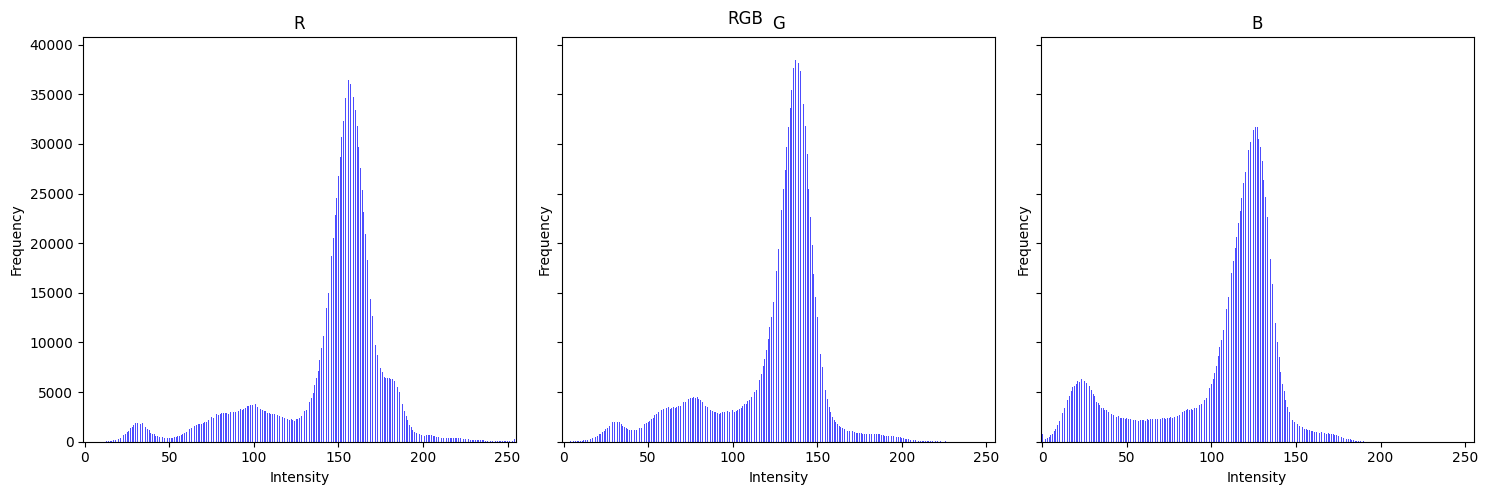

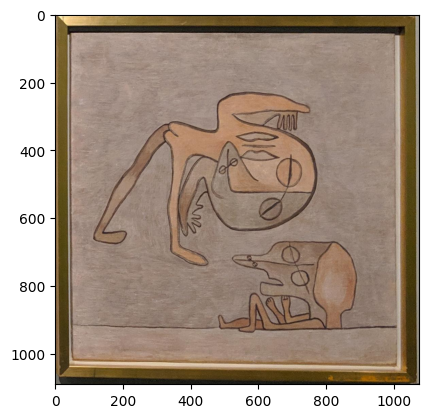

In [41]:
image3 = Image('./data/qsd1_w1/00000.jpg', interval=1)
image3.plot_histograms()
image3.show()